In [1]:
import os
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_REPOSITORY= '../data'
RAW_DATA_FILENAME= 'raw_modeling_data.csv'
RAW_DATA_PATH= os.path.join(
    DATA_REPOSITORY,
    RAW_DATA_FILENAME
)

# Feature Engineering

In [6]:
raw_modeling_data= pd.read_csv(
    filepath_or_buffer= RAW_DATA_PATH,
    index_col= 'ID_CLIENT',
    header= 0
)

In [8]:
raw_modeling_data.sample(5)

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,...,COMPANY,PROFESSIONAL_STATE,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,
40269,25,Web,1,F,1.0,3,AM,1,AM,Y,...,N,NO_JOB,N,NO_DATA,0,NaN,NaN,1,30,0
35821,10,NaN,1,M,2.0,8,PA,1,PA,Y,...,N,NO_JOB,N,NO_DATA,0,0.0,1.0,1,65,0
39740,15,Web,1,M,2.0,0,SP,1,SP,Y,...,Y,NO_JOB,N,NO_DATA,0,9.0,1.0,1,77,0
10888,20,Web,1,F,6.0,1,PR,1,PR,Y,...,Y,NO_JOB,N,NO_DATA,0,11.0,2.0,1,30,0
9705,10,NaN,1,M,3.0,0,RJ,1,SP,Y,...,N,NO_JOB,N,NO_DATA,0,9.0,2.0,1,71,0


In [9]:
def get_columns_metrics(df: pd.DataFrame, data_types: bool = True, unique_values: bool = True,null_values_q: bool = True, null_values_p: bool = True, numerator:int = None):
    
    df= df.copy()
    objs= []
    
    if data_types:
        col_dypes = df.dtypes
        col_dypes.name= "Data type" if numerator is None else f"Data type DF{numerator:02d}"
        objs.append(col_dypes)
        
    if unique_values:
        col_n_unique_values= df.nunique()
        col_n_unique_values.name= "# Unique Values" if numerator is None else f"# Unique Values DF{numerator:02d}"
        objs.append(col_n_unique_values)

    if null_values_q:
        col_n_null_values= df.isna().sum()
        col_n_null_values.name= "# NULL Values" if numerator is None else f"# NULL Values DF{numerator:02d}"
        objs.append(col_n_null_values)
        
    if null_values_p:
        col_per_null_values= np.round(df.isna().sum() / df.shape[0] * 100, 2)
        col_per_null_values.name= "% NULL Values" if numerator is None else f"% NULL Values DF{numerator:02d}"
        objs.append(col_per_null_values)
    
    output= pd.concat(
        objs= objs, 
        axis= 1
    )
    
    return output

In [11]:
columns_metrics= get_columns_metrics(raw_modeling_data,)
columns_metrics

,Data type,# Unique Values,# NULL Values,% NULL Values
PAYMENT_DAY,int64,6,0,0.00
APPLICATION_SUBMISSION_TYPE,object,2,19461,38.92
POSTAL_ADDRESS_TYPE,int64,2,0,0.00
SEX,object,2,65,0.13
MARITAL_STATUS,float64,7,202,0.40
QUANT_DEPENDANTS,int64,17,0,0.00
STATE_OF_BIRTH,object,29,0,0.00
NACIONALITY,int64,3,0,0.00
RESIDENCIAL_STATE,object,27,0,0.00
FLAG_RESIDENCIAL_PHONE,object,2,0,0.00


In [28]:
## Build processing pipeline
# Create individual transformers
num_transformer = Pipeline(
        steps=[
            ('imputer' , SimpleImputer(strategy='median')),
            ('scaler'  , RobustScaler())
        ]
)

cat_transformer = Pipeline(
        steps=[
            ('imputer2', SimpleImputer(missing_values=pd.NA,
                                      strategy='most_frequent')),
            ('encoder' , OneHotEncoder(drop='if_binary',
                                       #dtype='int8',
                                       handle_unknown='ignore',
                                       sparse=False))
        ]
)

# Ensemble all the transformers
preprocessor = ColumnTransformer(
        transformers=[
            ('num' , num_transformer , num_features),
            ('cat' , cat_transformer , cat_features)
        ]
)

In [29]:
# Use ColumnTransformer 'preprocessor' to process data
# Train data
X_train_pre   = preprocessor.fit_transform(X=X_train)
X_train_0_pre = preprocessor.transform(X=X_train_0)
# Validation data
X_val_pre = preprocessor.transform(X=X_val)
# Test data
X_test_pre = preprocessor.transform(X=X_test)

/home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
X_train_pre.shape

(32000, 306)

In [31]:
len(cat_features)+len(num_features)

32

In [32]:
# Define baseline model
baseline_classifier = RandomForestClassifier(random_state=SEED,
                                             n_jobs=-1,
                                             class_weight='balanced'
                                             )

In [33]:
# Cross Validation
cv_scores = cross_val_score(estimator=baseline_classifier,
                            X=X_train_0_pre,
                            y=y_train_0,
                            cv=5,
                            scoring='recall')

In [34]:
cv_scores

array([0.05505026, 0.05457157, 0.05887985, 0.05983724, 0.06031594])

In [35]:
baseline_classifier.fit(X=X_train_pre, y=y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1)

In [36]:
blm_predict = baseline_classifier.predict(X=X_val_pre)

In [38]:
blm_metrics = evaluation.get_performance(predictions=blm_predict,
                                               y_test=y_val)

Model Performance metrics:
------------------------------
Accuracy: 0.7342
Precision: 0.3822
Recall: 0.0651
F1 Score: 0.1112

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      5956
         1.0       0.38      0.07      0.11      2044

    accuracy                           0.73      8000
   macro avg       0.57      0.51      0.48      8000
weighted avg       0.66      0.73      0.66      8000


Prediction Confusion Matrix:
------------------------------
      0    1
0  5741  215
1  1911  133


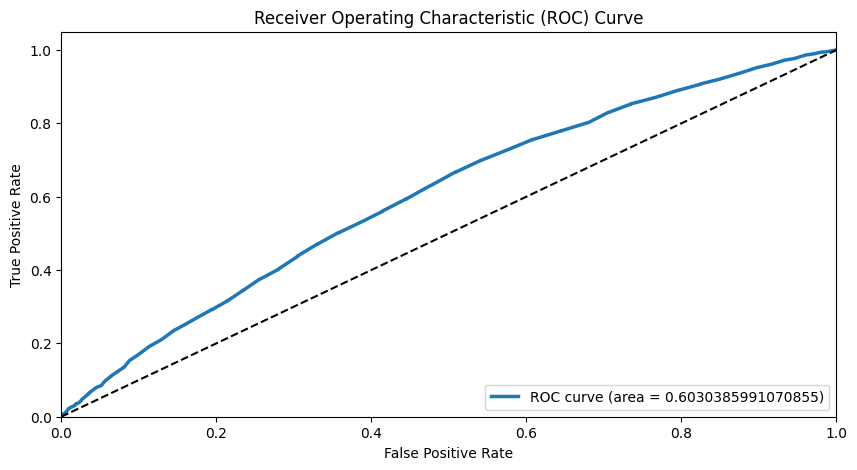

AUC Score of Baseline Model is 0.603


In [40]:
blm_roc_auc = evaluation.plot_roc(model=baseline_classifier,
                                        y_test=y_val,
                                        features=X_val_pre)

print(f'AUC Score of Baseline Model is {round(blm_roc_auc, 4)}')

In [41]:
# Try with another classifier
lgb_clf = LGBMClassifier(random_state=SEED, class_weight='balanced')
# Training
lgb_clf.fit(X=X_train_pre, y=y_train)
# Prediction
lgb_pred = lgb_clf.predict(X=X_val_pre)

In [43]:
lgb_metrics = evaluation.get_performance(predictions=lgb_pred,
                                               y_test=y_val)

Model Performance metrics:
------------------------------
Accuracy: 0.5886
Precision: 0.3359
Recall: 0.6243
F1 Score: 0.4368

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.58      0.68      5956
         1.0       0.34      0.62      0.44      2044

    accuracy                           0.59      8000
   macro avg       0.58      0.60      0.56      8000
weighted avg       0.69      0.59      0.61      8000


Prediction Confusion Matrix:
------------------------------
      0     1
0  3433  2523
1   768  1276


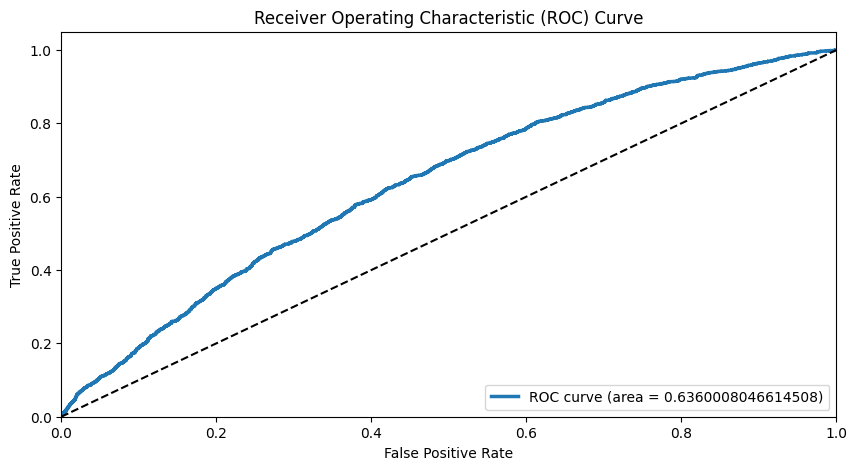

In [45]:
lgb_auc_score = evaluation.plot_roc(model=lgb_clf,
                                          y_test=y_val,
                                          features=X_val_pre)

In [46]:
# Hyperparameter Optimization
# Parameters
params = {
    'num_leaves'     : [30, 40, 50, 60, 70, 80, 90, 100],
    #'num_iterations' : [100, 200, 300, 400, 500],
    'learning_rate'  : [0.1, 0.01, 0.001, 0.0001]
}
# Set RandomizedSearchCV
best_lgb_clf = RandomizedSearchCV(estimator=lgb_clf,
                                  param_distributions=params,
                                  scoring='accuracy',
                                  n_iter=20)
# Train
lgb_search = best_lgb_clf.fit(X=X_train_pre, y=y_train)

In [47]:
lgb_search.best_params_

{'num_leaves': 90, 'learning_rate': 0.1}

In [48]:
best_lgb_clf_pred = best_lgb_clf.predict(X=X_val_pre)

In [49]:
best_lgb_clf_metrics = evaluation.get_performance(
    predictions=best_lgb_clf_pred, y_test=y_val)

Model Performance metrics:
------------------------------
Accuracy: 0.6091
Precision: 0.3399
Recall: 0.5626
F1 Score: 0.4238

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.63      0.70      5956
         1.0       0.34      0.56      0.42      2044

    accuracy                           0.61      8000
   macro avg       0.57      0.59      0.56      8000
weighted avg       0.69      0.61      0.63      8000


Prediction Confusion Matrix:
------------------------------
      0     1
0  3723  2233
1   894  1150


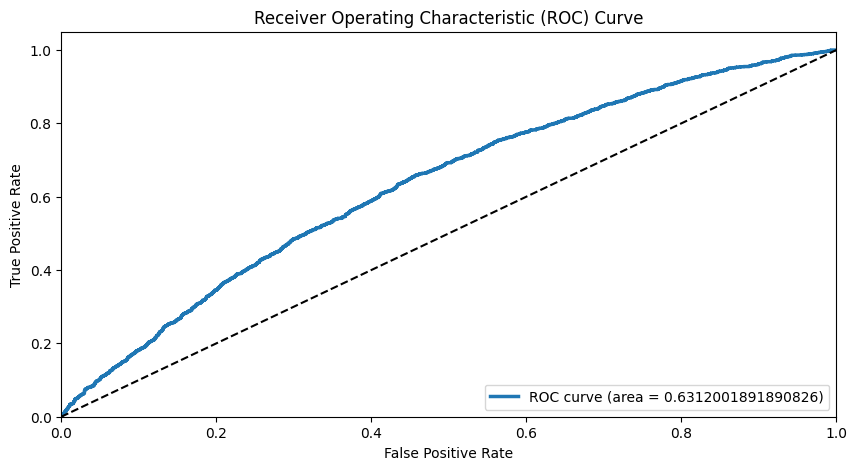

In [51]:
best_lgb_auc_score = evaluation.plot_roc(model=best_lgb_clf,
                                               y_test=y_val,
                                               features=X_val_pre)

In [53]:
# Define model
xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist',
                            max_depth=10,
                            eta=0.5,
                            objective='binary:logistic',
                            gpu_id='0',
                            eval_metric='auc',
                            seed=SEED)
# Train model
xgb_clf.fit(X=X_train_pre, y=y_train)
# Prediction
xgb_pred = xgb_clf.predict(X=X_val_pre)

[16:05:04] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [16:05:04] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7f0e8002a459]
  [bt] (1) /home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1e5571) [0x7f0e8002b571]
  [bt] (2) /home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1e595a) [0x7f0e8002b95a]
  [bt] (3) /home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x225a3d) [0x7f0e8006ba3d]
  [bt] (4) /home/fedecano/AnyoneAI/proyecto-final-anyoneai/project-final/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x7f0e7ff05098]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7f0eee1daff5]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7f0eee1da40a]
  [bt] (7) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x5b6) [0x7f0eee1fb316]
  [bt] (8) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x139ec) [0x7f0eee1fb9ec]



In [ ]:
xgb_auc = evaluation.plot_roc(model=xgb_clf,
                                    y_test=y_val,
                                    features=X_val_pre)